In [1]:
import pandas as pd

# Import data

In [2]:
# import the data set
dataSet = pd.read_csv('Zomato Chennai Listing 2020.csv')

# Get info about data

In [3]:
# How many rows and columns

dataSet.shape

(12032, 12)

In [4]:
# Head of the data total Five

dataSet.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [5]:
# dataSet information about object, int, float

dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


# Data cleaning

In [6]:
# Remove the columns address and Zomato URL is not wanted

dataSet.drop(['Address', 'Zomato URL'], axis = 1, inplace = True)

In [7]:
# And describe the Category data

dataSet[['Name of Restaurant', 'Location', 'Cuisine',
       'Top Dishes', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features']].describe()

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
count,12032,12032,12032,12032,12032,12032,12032,12032,12032
unique,8369,268,2423,2190,35,794,33,2282,1554
top,Amma Unavagam,Porur,['South Indian'],Invalid,None,Does not offer Dining,None,Not enough Delivery Reviews,"['Home Delivery', 'Indoor Seating']"
freq,78,418,883,9641,5351,2603,5851,3379,2447


In [8]:
# show the unique data in Delivery Rating Count

dataSet['Delivery Rating Count'].value_counts()

Not enough Delivery Reviews    3379
Does not offer Delivery        2252
None                            220
27                               34
60                               30
                               ... 
1472                              1
3272                              1
19500                             1
1908                              1
1548                              1
Name: Delivery Rating Count, Length: 2282, dtype: int64

In [9]:
# replace the Delivery Rating Count data for Not enough Delivery Reviews', 'Does not offer Delivery' and 'None' put 0

dataSet['Delivery Rating Count'].replace(to_replace = ['Not enough Delivery Reviews', 'Does not offer Delivery', 'None'], value = '0', inplace = True)

In [10]:
# after replace the Delivery Rating Count data

dataSet['Delivery Rating Count'].value_counts()

0        5870
27         34
22         30
32         30
60         30
         ... 
19500       1
1908        1
5228        1
1514        1
1671        1
Name: Delivery Rating Count, Length: 2279, dtype: int64

In [11]:
# some hotel are not provide the Dining table so, replace value

dataSet.replace(to_replace = ['None', 'Does not offer Dining', 'Not enough Dining Reviews'], value ='Not provide Dining',inplace=True)

In [12]:
# see the Unique Top Dishes 

dataSet['Top Dishes'].value_counts()

Invalid                                                                                                9641
['Biryani']                                                                                              30
['Coffee']                                                                                               14
['Chicken Biryani']                                                                                      12
['Pizza', ' Garlic Bread']                                                                               11
                                                                                                       ... 
['Fish', ' Luchi', ' Rolls', ' Chicken Chaap', ' Prawn Malai Curry', ' Rasgulla', ' Kosha Mangsho']       1
['Pizza', ' Salad', ' Fish', ' Pasta', ' Chaat', ' Biryani', ' Breakfast Buffet']                         1
['Butter Chicken', ' Naan']                                                                               1
['Mutton Biryani', ' Curd Va

In [13]:
# Most of the Top Dishes is Invalid so, change the Favourite Dishe. common for all the peoples

dataSet['Top Dishes'].replace(to_replace = 'Invalid', value = 'Favourite Dishe', inplace = True)

In [14]:
# after the replace the data 

dataSet['Top Dishes'].value_counts()

Favourite Dishe                                                                                        9641
['Biryani']                                                                                              30
['Coffee']                                                                                               14
['Chicken Biryani']                                                                                      12
['Pizza', ' Garlic Bread']                                                                               11
                                                                                                       ... 
['Rasmalai', ' Coffee', ' Chaat', ' Masala Dosa']                                                         1
['Vegetable Biryani', ' Gulab Jamun', ' Basmati Rice']                                                    1
['Fish', ' Luchi', ' Rolls', ' Chicken Chaap', ' Prawn Malai Curry', ' Rasgulla', ' Kosha Mangsho']       1
['Pizza', ' Salad', ' Fish',

# Location

In [15]:
# see the unique Location data

dataSet["Location"].value_counts()

Porur                                       418
Velachery                                   372
Ambattur                                    334
T. Nagar                                    315
Perungudi                                   288
                                           ... 
Days Hotel, Old Mahabalipuram Road (OMR)      1
Hotel Regenta Central RS, Navallur            1
Mamalla Beach Resort, Mahabalipuram           1
Southern Residency Hotel, OMR                 1
IBIS Hotel, Old Mahabalipuram Road (OMR)      1
Name: Location, Length: 268, dtype: int64

In [16]:
# Replacing Small regions with Known region name

detectCommaSymbol = dataSet[dataSet['Location'].str.find(",") != -1]['Location']
for x in detectCommaSymbol:
    valSplit = x.split(',')
    dataSet['Location'].replace(to_replace = x, value = " ".join(valSplit[1].split()), inplace = True)

In [17]:
# after replaced

dataSet['Location'].value_counts()

Velachery             421
Porur                 421
Ambattur              361
T. Nagar              335
Perungudi             288
                     ... 
Kanchipuram             2
Sriperumbudur           2
Somerset Greenways      2
East...                 1
The Slate               1
Name: Location, Length: 129, dtype: int64

In [18]:
# finall data set cleaning

dataSet.to_csv('PreProcessing Zomato Chennai.csv', index=False,header=True)

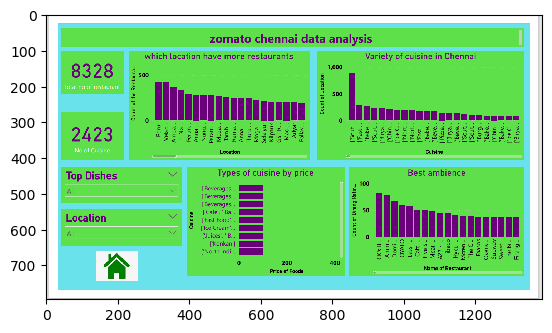

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as img
testImage = img.imread(r'C:\Users\REVANTH KUMAR\Pictures\Screenshots\chennai.png')
plt.imshow(testImage)